# Démonstration avec un notebook Jupyter

Cette démonstration  de la manipulation d'une base _neo4j_ va être possible grâce aux éléments suivant

* une base neo4j en mode sandbox d'une durée limitée
* de la librairie _py2neo_
* de la libraire javascript visjs pour la visualisation


## Obtenir une base Neo4j

* Aller sur https://neo4j.com/sandbox-v2/
* Demander à avoir une _blank box_
* pour avoir les paramétres de connexion, aller dans l'onglet **details** et noter 
  * username
  * password
  * IP adress
  * bolt port

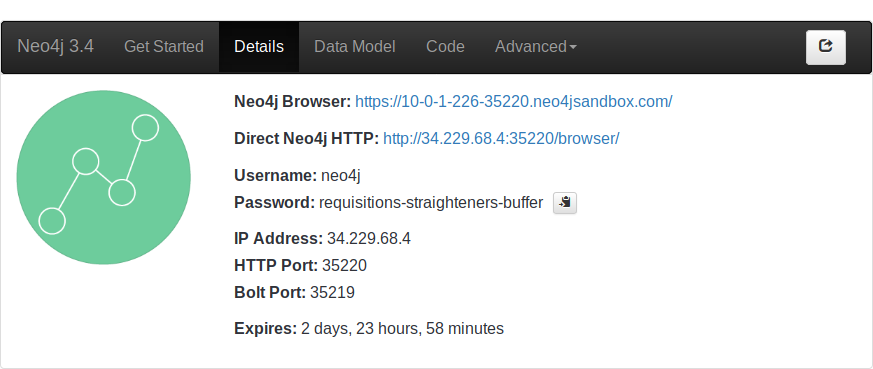

Ces paramètres serviront à vous connecter avec la librairie _py2neo_.

Dans le cas présent, cela serait

```python
from py2neo import Graph

graph = Graph("bolt://34.229.68.4:35219",auth=("neo4j", "requisitions-straighteners-buffer"))
```


## Installer la librairie py2neo

### En local

Si vous avez téléchargé ce notebook en local, créez un environnement virtuel à la racine

```console
virtualenv -p python3 ./
```

puis installez _py2neo_

```console
pip install py2neo
```

### Sur un serveur jupyter

Pour installer la libraire _py2neo_ dans un notebook jupyter, il y a une astuce: créer le bloc d'instruction 
```python
import sys
!{sys.executable} -m pip install py2neo ;
```
et l'exécuter avec CTRL+ENTER.


## Installation libraire py2neo

In [1]:
import sys
import pkgutil
if not pkgutil.find_loader("py2neo"):
    !{sys.executable} -m pip install py2neo

import py2neo
import neo4j
print("Librairie py2neo version {} ".format(py2neo.__version__))
print("Librairie neo4j  version {} ".format(neo4j.__version__))


Librairie py2neo version 4.1.0 
Librairie neo4j  version 1.6.2 


## Connexion à la base graphe neo4j


In [2]:
from py2neo import Graph

graph = Graph('bolt://52.86.202.234:33273', auth=('neo4j','chairperson-firers-airs'))
graph.database

<Database uri='bolt://52.86.202.234:33273' secure=False user_agent='py2neo/4.1.0 neo4j-python/1.6.2 Python/3.6.3-final-0 (linux)'>

Nous allons obtenir quelques informations sur la base.

In [3]:
graph.run('CALL apoc.monitor.kernel()').to_table()

readOnly,kernelVersion,storeId,kernelStartTime,databaseName,storeLogVersion,storeCreationDate
false,"neo4j-kernel, version: 3.4.7,be5c7e8cd4392c69f1e4ac630415497ada29e7ae",e93ab1f02b5f305f,2018-11-24 21:24:11,graph.db,0,2018-11-24 21:24:12


## Réinitionalisation de la base

Nous allons détruire tous les noeuds et relations existants.

In [4]:
graph.delete_all()

# Creation de quelques noeuds

Scripts de conversion à externaliser par la suite

In [5]:
from scripts import vis
def build_VIS_list_and_draw_network(name, subg, node_fn=None, relation_fn=None):

    def default_node_fn(n):
        return {'id': n['code'], 'label': n['code'], 'group': list(n.labels)[0] }
    
    def defaut_relation_fn(r):
        return {'from': r.start_node['code'], 'to': r.end_node['code']}

    if not node_fn:
        node_fn = default_node_fn
        
    if not relation_fn:
        relation_fn = defaut_relation_fn
    
    nodes = []
    edges = []
    for n in subg.nodes:
        nodes.append(node_fn(n))

    for r in subg.relationships:
        edges.append(relation_fn(r))
        
    return vis.vis_network(name,nodes,edges,False)

def draw_query(name, query, node_fn=None, relation_fn=None):
    subg = graph.run(query).to_subgraph()
    return build_VIS_list_and_draw_network(name, subg, node_fn, relation_fn)

In [6]:
draw_query('book','CREATE (n:Book {code:"GraphForDummies"}) RETURN n')

Création d'une relation

In [7]:
graph.run('CREATE (a:Author {code:"Alan"})')

query = '''MATCH (b:Book {code:"GraphForDummies"}),(a:Author {code:"Alan"})
CREATE (a)-[r:WRITE]->(b)
RETURN a,r,b'''

draw_query('book_relation', query)